In [4]:
from IPython.display import Image
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sym


In [5]:
n = sym.Symbol('n')
t = sym.Symbol('t')


In [6]:
Tmin = 0
Tmax = 2*np.pi

T=Tmax-Tmin
w = 2*np.pi/T

# ft es una función simbólica
ft=t

In [7]:
# Calculamos la integral para a0
f_integral = ft
a0 = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
print("a0 = ")
sym.pprint(a0)

# Calculamos la integral para an
f_integral = ft*sym.cos(n*w*t)
an = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
an = sym.simplify(an)
print("an = ")
sym.pprint(an)

# Calculamos la integral para bn
f_integral = ft*sym.sin(n*w*t)
bn = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
print("bn = ")
bn = sym.simplify(bn)
sym.pprint(bn)

a0 = 
6.28318530717959
an = 
⎧0.318309886183791⋅(6.28318530717959⋅n⋅sin(6.28318530717959⋅n) + 1.0⋅cos(6.283
⎪─────────────────────────────────────────────────────────────────────────────
⎪                                                 2                           
⎨                                                n                            
⎪                                                                             
⎪                                         6.28318530717959                    
⎩                                                                             

18530717959⋅n) - 1.0)                            
─────────────────────  for n > -∞ ∧ n < ∞ ∧ n ≠ 0
                                                 
                                                 
                                                 
                               otherwise         
                                                 
bn = 
⎧0.318309886183791⋅(-6.28318530717959⋅n⋅cos(6.28318530717959⋅

In [8]:
# Definimos el número de armónicos para la expansión
serie = 0
Armonicos = 3

for i in range(1,Armonicos+1):
    
    # Evaluamos los coeficientes para cada armónico
    an_c = an.subs(n,i)
    bn_c = bn.subs(n,i)
    
    if abs(an_c) < 0.0001: an_c = 0
    if abs(bn_c) < 0.0001: bn_c = 0
        
    serie= serie + an_c*sym.cos(i*w*t) # Términos coseno de la serie
    serie = serie + bn_c*sym.sin(i*w*t) # Términos seno de la serie

serie = a0/2+serie  # Expansión final de la serie

print('f(t)= ')
sym.pprint(serie)

f(t)= 
-2.0⋅sin(1.0⋅t) - 1.0⋅sin(2.0⋅t) - 0.666666666666667⋅sin(3.0⋅t) + 3.1415926535
8979


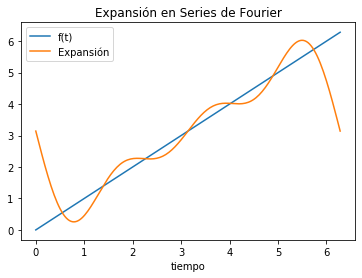

In [9]:
# Convertimos la expresión Sympy a una función evaluable
fserie = sym.lambdify(t,serie)
f = sym.lambdify(t,ft)

# Creamos un vector de tiempo para la gráfica
v_tiempo = np.linspace(Tmin,Tmax,200)

# Evaluamos las funciones
fserieG = fserie(v_tiempo)
fG = f(v_tiempo)
 
plt.plot(v_tiempo,fG,label = 'f(t)')
plt.plot(v_tiempo,fserieG,label = 'Expansión')

plt.xlabel('tiempo')
plt.legend()
plt.title('Expansión en Series de Fourier')
plt.show()

In [10]:
n = sym.Symbol('n')
t=sym.Symbol('t')

In [11]:
Tmin = -2
Tmax = 2

T=Tmax-Tmin
w = 2*np.pi/T

f1=-1
f2=1

# ft es una función simbólica por tramos
ft = sym.Piecewise((f1, ((t <= -1) & (t >= -2))), (f2, ((t > -1) & (t <= 2))))
ft

Piecewise((-1, (t >= -2) & (t <= -1)), (1, (t <= 2) & (t > -1)))

In [13]:
# Calculamos la integral para a0
f_integral = ft
a0 = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
print("a0 = ")
sym.pprint(a0)

# Calculamos la integral para an
f_integral = ft*sym.cos(n*w*t)
an = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
an = sym.simplify(an)
print("an = ")
sym.pprint(an)

# Calculamos la integral para bn
f_integral = ft*sym.sin(n*w*t)
bn = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
print("bn = ")
bn = sym.simplify(bn)
sym.pprint(bn)

a0 = 
1.00000000000000
an = 
⎧0.636619772367581⋅sin(1.5707963267949⋅n)           
⎪────────────────────────────────────────  for n ≠ 0
⎨                   n                               
⎪                                                   
⎩                  1.0                     otherwise
bn = 
⎧0.636619772367581⋅(cos(1.5707963267949⋅n) - cos(3.14159265358979⋅n))         
⎪────────────────────────────────────────────────────────────────────  for n ≠
⎨                                 n                                           
⎪                                                                             
⎩                                 0                                    otherwi

  
 0
  
  
se


In [14]:
# Definimos el número de armónicos para la expansión
serie = 0
Armonicos = 30

for i in range(1,Armonicos+1):
    
    # Evaluamos los coeficientes para cada armónico
    an_c = an.subs(n,i)
    bn_c = bn.subs(n,i)
    
    if abs(an_c) < 0.0001: an_c = 0
    if abs(bn_c) < 0.0001: bn_c = 0
        
    serie= serie + an_c*sym.cos(i*w*t) # Términos coseno de la serie
    serie = serie + bn_c*sym.sin(i*w*t) # Términos seno de la serie

serie = a0/2+serie  # Expansión final de la serie

print('f(t)= ')
sym.pprint(serie)

f(t)= 
0.636619772367581⋅sin(1.5707963267949⋅t) - 0.636619772367581⋅sin(3.14159265358
979⋅t) + 0.212206590789194⋅sin(4.71238898038469⋅t) + 0.127323954473516⋅sin(7.8
5398163397448⋅t) - 0.212206590789194⋅sin(9.42477796076938⋅t) + 0.0909456817667
973⋅sin(10.9955742875643⋅t) + 0.0707355302630646⋅sin(14.1371669411541⋅t) - 0.1
27323954473516⋅sin(15.707963267949⋅t) + 0.0578745247606891⋅sin(17.278759594743
9⋅t) + 0.0489707517205831⋅sin(20.4203522483337⋅t) - 0.0909456817667973⋅sin(21.
9911485751286⋅t) + 0.0424413181578387⋅sin(23.5619449019234⋅t) + 0.037448221903
9753⋅sin(26.7035375555132⋅t) - 0.0707355302630646⋅sin(28.2743338823081⋅t) + 0.
03350630380882⋅sin(29.845130209103⋅t) + 0.0303152272555991⋅sin(32.986722862692
8⋅t) - 0.0578745247606892⋅sin(34.5575191894877⋅t) + 0.0276791205377208⋅sin(36.
1283155162826⋅t) + 0.0254647908947033⋅sin(39.2699081698724⋅t) - 0.048970751720
5832⋅sin(40.8407044966673⋅t) + 0.0235785100876881⋅sin(42.4115008234622⋅t) + 0.
0219524059437097⋅sin(45.553093477052⋅t) - 0.0

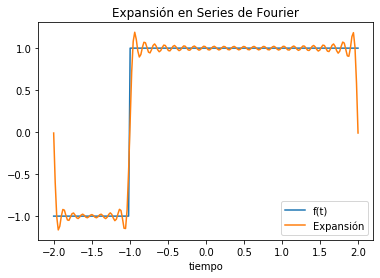

In [15]:
# Convertimos la expresión Sympy a una función evaluable
fserie = sym.lambdify(t,serie)
f = sym.lambdify(t,ft)

# Creamos un vector de tiempo para la gráfica
v_tiempo = np.linspace(Tmin,Tmax,200)

# Evaluamos las funciones
fserieG = fserie(v_tiempo)
fG = f(v_tiempo)
 
plt.plot(v_tiempo,fG,label = 'f(t)')
plt.plot(v_tiempo,fserieG,label = 'Expansión')

plt.xlabel('tiempo')
plt.legend()
plt.title('Expansión en Series de Fourier')
plt.show()